# Optimization

## Stochastic Gradient Descent

In [93]:
def L_layer_model_HE_and_xavier_and_reg_and_stochastic(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, lambd = 0.7 ,print_cost=False): #lr was 0.009
    
    start = time.time()
    np.random.seed(1)
    costs = []                         # keep track of cost
    lambd = 0.7
    m = X.shape[1]
    
    parameters = initialize_parameters_deep_He_and_xavier(layers_dims)
    
    for i in range(0, num_iterations):
        for j in range(m):
            X_new = X[:,j].reshape(X.shape[0],1)
            Y_new = Y[:,j].reshape(Y.shape[0],1)
            AL, caches = L_model_forward(X_new, parameters)
            cost = compute_cost_reg(AL, Y_new , parameters, lambd)
            grads = L_model_backward_reg(AL, Y_new , caches, lambd)
            parameters = update_parameters(parameters, grads, learning_rate)
            
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    end = time.time()
    print("the time required is " + str(end-start))
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    nn_model ={}
    nn_model = {"costs": costs, "Parameters": parameters}
    
    return nn_model

##### Run it if you have a lot of patience XD

In [ ]:
parameters = L_layer_model_HE_and_xavier_and_reg_and_stochastic(x_train, y_train, layers_dims, num_iterations=2500, print_cost=True)

## Mini Batch

In [95]:
def minibatches(X, Y, mini_batch_size):
    
    m = X.shape[1]                  # number of training examples
    mini_batches = []
        
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((1,m))

    num_complete_minibatches = math.floor(m/mini_batch_size)
    
    for k in range(0, num_complete_minibatches):
        
        mini_batch_X = shuffled_X[:,k * mini_batch_size:(k + 1) * mini_batch_size]
        mini_batch_Y = shuffled_Y[:,k * mini_batch_size:(k + 1) * mini_batch_size]
            
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    
    if m % mini_batch_size != 0:
        
        end = m - mini_batch_size * math.floor(m / mini_batch_size)
        mini_batch_X = shuffled_X[:,num_complete_minibatches * mini_batch_size:]
        mini_batch_Y = shuffled_Y[:,num_complete_minibatches * mini_batch_size:]
        
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches


In [96]:
def L_layer_model_HE_and_xavier_and_reg_and_mini_batch(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, lambd = 0.7 ,print_cost=False): #lr was 0.009
    
    start = time.time()
    np.random.seed(1)
    costs = []                         # keep track of cost
    lambd = 0.7
    m = X.shape[1]
    mini_batch_size = 64
    
    parameters = initialize_parameters_deep_He_and_xavier(layers_dims)
    mini_batches = minibatches(X, Y, mini_batch_size)
    num_batches = math.floor(m/ mini_batch_size) 
    
    for i in range(0, num_iterations):
        for j in range(num_batches):
            
            AL, caches = L_model_forward(mini_batches[j][0], parameters)
            cost = compute_cost_reg(AL, mini_batches[j][1] , parameters, lambd)
            grads = L_model_backward_reg(AL, mini_batches[j][1] , caches, lambd)
            parameters = update_parameters(parameters, grads, learning_rate)
            
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    end = time.time()
    print("the time required is " + str(end-start))
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    
    return parameters

Cost after iteration 0: 0.693237
Cost after iteration 100: 0.617729
Cost after iteration 200: 0.553712
Cost after iteration 300: 0.446439
Cost after iteration 400: 0.414528
Cost after iteration 500: 0.240328
Cost after iteration 600: 0.173523
Cost after iteration 700: 0.104111
Cost after iteration 800: 0.080667
Cost after iteration 900: 0.064986
Cost after iteration 1000: 0.055104
Cost after iteration 1100: 0.047855
Cost after iteration 1200: 0.042531
Cost after iteration 1300: 0.039149
Cost after iteration 1400: 0.035808
Cost after iteration 1500: 0.033532
Cost after iteration 1600: 0.031623
Cost after iteration 1700: 0.029781
Cost after iteration 1800: 0.028625
Cost after iteration 1900: 0.027537
Cost after iteration 2000: 0.026778
Cost after iteration 2100: 0.026187
Cost after iteration 2200: 0.026443
Cost after iteration 2300: 0.025450
Cost after iteration 2400: 0.025144
the time required is 220.02813148498535


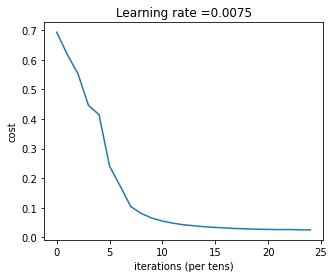


-------------------------------------------------------

the Accuracy on the training set is
Accuracy: 0.9617224880382773

the Accuracy on the test set is
Accuracy: 0.76


In [97]:
parameters = L_layer_model_HE_and_xavier_and_reg_and_mini_batch(x_train, y_train, layers_dims, num_iterations=2500, print_cost=True)

print ('\n' + "-------------------------------------------------------" + '\n')  


print("the Accuracy on the training set is")
train_accuracy = predict(x_train, y_train, parameters)
print()
print("the Accuracy on the test set is")
test_accuracy = predict(x_test, y_test, parameters)

## Momentum

### Velocity

In [99]:
def initialize_velocity(parameters):
    
    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}
    
    for l in range(L):
        
        v["dW" + str(l + 1)] = np.zeros_like(parameters["W" + str(l+1)])
        v["db" + str(l + 1)] = np.zeros_like(parameters["b" + str(l+1)])
        
    return v

### Update Parameters with Momentum

In [100]:
def update_parameters_momentum(parameters, grads, v, beta, learning_rate):
   
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    for l in range(L):
        
        v["dW" + str(l + 1)] = beta * v["dW" + str(l + 1)] + (1 - beta) * grads['dW' + str(l + 1)]
        v["db" + str(l + 1)] = beta * v["db" + str(l + 1)] + (1 - beta) * grads['db' + str(l + 1)]
        
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * v["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * v["db" + str(l+1)]
        
    return parameters

### Model

In [101]:
def L_layer_model_HE_and_xavier_and_reg_and_mini_batch_and_momentum(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, lambd = 0.7 ,print_cost=False): #lr was 0.009
    
    start = time.time()
    np.random.seed(1)
    costs = []                         # keep track of cost
    lambd = 0.7
    m = X.shape[1]
    mini_batch_size = 64
    beta = 0.9
    
    parameters = initialize_parameters_deep_He_and_xavier(layers_dims)
    v = initialize_velocity(parameters)
    
    mini_batches = minibatches(X, Y, mini_batch_size)
    num_batches = math.floor(m/ mini_batch_size) 
    
    for i in range(0, num_iterations):
        for j in range(num_batches):
            
            AL, caches = L_model_forward(mini_batches[j][0], parameters)
            cost = compute_cost_reg(AL, mini_batches[j][1] , parameters, lambd)
            grads = L_model_backward_reg(AL, mini_batches[j][1] , caches, lambd)
            
            parameters = update_parameters_momentum(parameters, grads, v, beta, learning_rate)
            
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    end = time.time()
    print("the time required is " + str(end-start))
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    
    return parameters

Cost after iteration 0: 0.733508
Cost after iteration 100: 0.628070
Cost after iteration 200: 0.604685
Cost after iteration 300: 0.593740
Cost after iteration 400: 0.584969
Cost after iteration 500: 0.574944
Cost after iteration 600: 0.559889
Cost after iteration 700: 0.538985
Cost after iteration 800: 0.501484
Cost after iteration 900: 0.306619
Cost after iteration 1000: 0.232451
Cost after iteration 1100: 0.219794
Cost after iteration 1200: 0.202035
Cost after iteration 1300: 0.172950
Cost after iteration 1400: 0.151554
Cost after iteration 1500: 0.138373
Cost after iteration 1600: 0.127257
Cost after iteration 1700: 0.117614
Cost after iteration 1800: 0.109395
Cost after iteration 1900: 0.102263
Cost after iteration 2000: 0.095783
Cost after iteration 2100: 0.090049
Cost after iteration 2200: 0.085329
Cost after iteration 2300: 0.081082
Cost after iteration 2400: 0.076875
the time required is 258.7725944519043


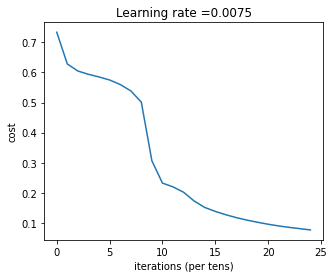


-------------------------------------------------------

the Accuracy on the training set is
Accuracy: 0.9282296650717701

the Accuracy on the test set is
Accuracy: 0.7


In [102]:
parameters = L_layer_model_HE_and_xavier_and_reg_and_mini_batch_and_momentum(x_train, y_train, layers_dims, num_iterations=2500, print_cost=True)

print ('\n' + "-------------------------------------------------------" + '\n')  


print("the Accuracy on the training set is")
train_accuracy = predict(x_train, y_train, parameters)
print()
print("the Accuracy on the test set is")
test_accuracy = predict(x_test, y_test, parameters)

## RMS prop

In [104]:
def update_parameters_rms(parameters, grads, v, beta, learning_rate):
   
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    for l in range(L):
        
        v["dW" + str(l + 1)] = beta * v["dW" + str(l + 1)] + (1 - beta) * np.square(grads['dW' + str(l + 1)])
        v["db" + str(l + 1)] = beta * v["db" + str(l + 1)] + (1 - beta) * np.square(grads['db' + str(l + 1)])
        
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)] /np.sqrt(v["dW" + str(l + 1)] + 10**(-8))
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)] /np.sqrt(v["db" + str(l + 1)] + 10**(-8))
        
    return parameters

### Update Params with RMS prop

In [103]:
def L_layer_model_HE_and_xavier_and_reg_and_mini_batch_and_RMS(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, lambd = 0.7 ,print_cost=False): #lr was 0.009
    
    start = time.time()
    np.random.seed(1)
    costs = []                         # keep track of cost
    lambd = 0.7
    m = X.shape[1]
    mini_batch_size = 64
    beta = 0.9
    
    parameters = initialize_parameters_deep_He_and_xavier(layers_dims)
    v = initialize_velocity(parameters)
    
    mini_batches = minibatches(X, Y, mini_batch_size)
    num_batches = math.floor(m/ mini_batch_size) 
    
    for i in range(0, num_iterations):
        for j in range(num_batches):
            
            AL, caches = L_model_forward(mini_batches[j][0], parameters)
            cost = compute_cost_reg(AL, mini_batches[j][1] , parameters, lambd)
            grads = L_model_backward_reg(AL, mini_batches[j][1] , caches, lambd)
            v = initialize_velocity(parameters)
            parameters = update_parameters_rms(parameters, grads, v, beta , learning_rate)
            
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    end = time.time()
    print("the time required is " + str(end-start))
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

## ADAM

### Initialize Adam

In [105]:
def initialize_adam(parameters) :
   
    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}
    s = {}
    
    for l in range(L):
        
        v["dW" + str(l + 1)] = np.zeros_like(parameters["W" + str(l + 1)])
        v["db" + str(l + 1)] = np.zeros_like(parameters["b" + str(l + 1)])

        s["dW" + str(l+1)] = np.zeros_like(parameters["W" + str(l + 1)])
        s["db" + str(l+1)] = np.zeros_like(parameters["b" + str(l + 1)])
    
    return v, s

### Update Parameters with ADAM

In [106]:
def update_parameters_with_adam(parameters, grads, v, s, t, learning_rate=0.01,
                                beta1=0.9, beta2=0.999, epsilon=1e-8):
    
    
    L = len(parameters) // 2                 # number of layers in the neural networks
    v_corrected = {}                         # Initializing first moment estimate, python dictionary
    s_corrected = {}                         # Initializing second moment estimate, python dictionary
    
    
    for l in range(L):
        
        v["dW" + str(l + 1)] = beta1 * v["dW" + str(l + 1)] + (1 - beta1) * grads['dW' + str(l + 1)]
        v["db" + str(l + 1)] = beta1 * v["db" + str(l + 1)] + (1 - beta1) * grads['db' + str(l + 1)]
        
        v_corrected["dW" + str(l + 1)] = v["dW" + str(l + 1)] / (1 - np.power(beta1, t))
        v_corrected["db" + str(l + 1)] = v["db" + str(l + 1)] / (1 - np.power(beta1, t))
        
        s["dW" + str(l + 1)] = beta2 * s["dW" + str(l + 1)] + (1 - beta2) * np.power(grads['dW' + str(l + 1)], 2)
        s["db" + str(l + 1)] = beta2 * s["db" + str(l + 1)] + (1 - beta2) * np.power(grads['db' + str(l + 1)], 2)
        
        s_corrected["dW" + str(l + 1)] = s["dW" + str(l + 1)] / (1 - np.power(beta2, t))
        s_corrected["db" + str(l + 1)] = s["db" + str(l + 1)] / (1 - np.power(beta2, t))
        
        parameters["W" + str(l + 1)] = parameters["W" + str(l + 1)] - learning_rate * v_corrected["dW" + str(l + 1)] / np.sqrt(s_corrected["dW" + str(l + 1)] + epsilon)
        parameters["b" + str(l + 1)] = parameters["b" + str(l + 1)] - learning_rate * v_corrected["db" + str(l + 1)] / np.sqrt(s_corrected["db" + str(l + 1)] + epsilon)
        

    return parameters, v, s

### Model

In [107]:
def L_layer_model_HE_and_xavier_and_reg_and_mini_batch_and_ADAM(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, lambd = 0.7 ,print_cost=False): #lr was 0.009
    
    start = time.time()
    np.random.seed(1)
    costs = []                         # keep track of cost
    lambd = 0.7
    m = X.shape[1]
    mini_batch_size = 64
    beta = 0.9
    t = 0
    
    
    parameters = initialize_parameters_deep_He_and_xavier(layers_dims)
    v, s = initialize_adam(parameters)
    
    mini_batches = minibatches(X, Y, mini_batch_size)
    num_batches = math.floor(m/ mini_batch_size) 
    
    for i in range(0, num_iterations):
        for j in range(num_batches):
            
            AL, caches = L_model_forward(mini_batches[j][0], parameters)
            cost = compute_cost_reg(AL, mini_batches[j][1] , parameters, lambd)
            grads = L_model_backward_reg(AL, mini_batches[j][1] , caches, lambd)
            t = t + 1
            parameters,v,s = update_parameters_with_adam(parameters, grads, v, s, t, learning_rate=0.01,
                                beta1=0.9, beta2=0.999, epsilon=1e-8)
            
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    end = time.time()
    print("the time required is " + str(end-start))
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    
    return parameters

Cost after iteration 0: 0.688545
Cost after iteration 100: 0.590378
Cost after iteration 200: 0.590150
Cost after iteration 300: 0.589970
Cost after iteration 400: 0.589849
Cost after iteration 500: 0.589774
Cost after iteration 600: 0.589727
Cost after iteration 700: 0.589698
Cost after iteration 800: 0.589679
Cost after iteration 900: 0.589667
Cost after iteration 1000: 0.589658
Cost after iteration 1100: 0.589653
Cost after iteration 1200: 0.589649
Cost after iteration 1300: 0.589645
Cost after iteration 1400: 0.589642
Cost after iteration 1500: 0.589640
Cost after iteration 1600: 0.589637
Cost after iteration 1700: 0.589635
Cost after iteration 1800: 0.589632
Cost after iteration 1900: 0.589629
Cost after iteration 2000: 0.589626
Cost after iteration 2100: 0.589623
Cost after iteration 2200: 0.589620
Cost after iteration 2300: 0.589618
Cost after iteration 2400: 0.589616
the time required is 628.4007616043091


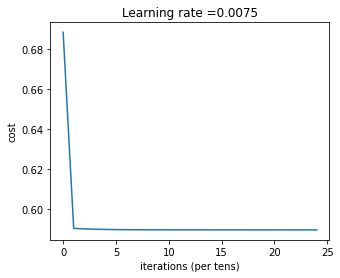


-------------------------------------------------------

the Accuracy on the training set is
Accuracy: 0.6555023923444976

the Accuracy on the test set is
Accuracy: 0.3400000000000001


In [108]:
parameters = L_layer_model_HE_and_xavier_and_reg_and_mini_batch_and_ADAM(x_train, y_train, layers_dims, num_iterations=2500, print_cost=True)

print ('\n' + "-------------------------------------------------------" + '\n')  


print("the Accuracy on the training set is")
train_accuracy = predict(x_train, y_train, parameters)
print()
print("the Accuracy on the test set is")
test_accuracy = predict(x_test, y_test, parameters)

## Learning Rate Decay

### Update learing rate with decay

In [114]:
def update_parameters_with_rate_decay(parameters, grads, decay_rate , i ,learning_rate=0.01):
    
    
    L = len(parameters) // 2                 # number of layers in the neural networks
    
    
    for l in range(L):
        
        parameters["W" + str(l + 1)] = parameters["W" + str(l + 1)] - (learning_rate /(1 + decay_rate**(i))) * grads["dW" + str(l + 1)] 
        parameters["b" + str(l + 1)] = parameters["b" + str(l + 1)] - (learning_rate/(1 + decay_rate**(i))) * grads["db" + str(l + 1)] 
        

    return parameters

### Model

In [115]:
def L_layer_model_HE_and_xavier_and_reg_and_mini_batch_and_rate_decay(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, lambd = 0.7 ,print_cost=False): #lr was 0.009
    
    start = time.time()
    np.random.seed(1)
    costs = []                         # keep track of cost
    lambd = 0.7
    m = X.shape[1]
    mini_batch_size = 64
    beta = 0.9
    t = 0
    decay_rate = 0.2
    
    
    parameters = initialize_parameters_deep_He_and_xavier(layers_dims)
    
    mini_batches = minibatches(X, Y, mini_batch_size)
    num_batches = math.floor(m/ mini_batch_size) 
    
    for i in range(0, num_iterations):
        for j in range(num_batches):
            
            AL, caches = L_model_forward(mini_batches[j][0], parameters)
            cost = compute_cost_reg(AL, mini_batches[j][1] , parameters, lambd)
            grads = L_model_backward_reg(AL, mini_batches[j][1] , caches, lambd)
            parameters = update_parameters_with_rate_decay(parameters, grads, decay_rate, i, learning_rate=0.01)
            
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    end = time.time()
    print("the time required is " + str(end-start))
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    
    return parameters

Cost after iteration 0: 0.699501
Cost after iteration 100: 0.611262
Cost after iteration 200: 0.471291
Cost after iteration 300: 0.290895
Cost after iteration 400: 0.346268
Cost after iteration 500: 0.106287
Cost after iteration 600: 0.069334
Cost after iteration 700: 0.052778
Cost after iteration 800: 0.043692
Cost after iteration 900: 0.037200
Cost after iteration 1000: 0.033222
Cost after iteration 1100: 0.031056
Cost after iteration 1200: 0.028244
Cost after iteration 1300: 0.027237
Cost after iteration 1400: 0.026224
Cost after iteration 1500: 0.024749
Cost after iteration 1600: 0.024103
Cost after iteration 1700: 0.023707
Cost after iteration 1800: 0.023199
Cost after iteration 1900: 0.022942
Cost after iteration 2000: 0.022996
Cost after iteration 2100: 0.022514
Cost after iteration 2200: 0.022308
Cost after iteration 2300: 0.022147
Cost after iteration 2400: 0.021873
the time required is 220.50304412841797


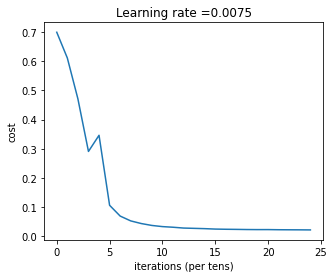


-------------------------------------------------------

the Accuracy on the training set is
Accuracy: 0.9617224880382773

the Accuracy on the test set is
Accuracy: 0.7400000000000001


In [116]:
parameters = L_layer_model_HE_and_xavier_and_reg_and_mini_batch_and_rate_decay(x_train, y_train, layers_dims, num_iterations=2500, print_cost=True)

print ('\n' + "-------------------------------------------------------" + '\n')  


print("the Accuracy on the training set is")
train_accuracy = predict(x_train, y_train, parameters)
print()
print("the Accuracy on the test set is")
test_accuracy = predict(x_test, y_test, parameters)